# Convolutional Neural Networks Project


---

# CIFAR-10 Image Classification using CNNs

In this notebook, we will build a Convolutional Neural Network (CNN) model to classify images from the CIFAR-10 dataset. The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 different classes, such as planes, cars , birds, cats, and more.

### Step 1: Import dataset and image visualization

Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class. Change the name for each class.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset with custom labels
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Define the custom class names
custom_class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Create a Dataset object from the training data
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))

# Set the class names attribute of the Dataset object
train_dataset.class_names = custom_class_names

# Use the class_names attribute to get the custom class names
print(train_dataset.class_names)

2024-09-27 09:13:29.685277: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-27 09:13:29.685335: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-27 09:13:29.686483: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-27 09:13:29.692539: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-27 09:13:30.515373: W tensorflow/compiler/tf2

170498071/170498071 [==============================] - 3s 0us/step


2024-09-27 09:13:36.802163: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-27 09:13:36.868771: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-27 09:13:36.868951: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


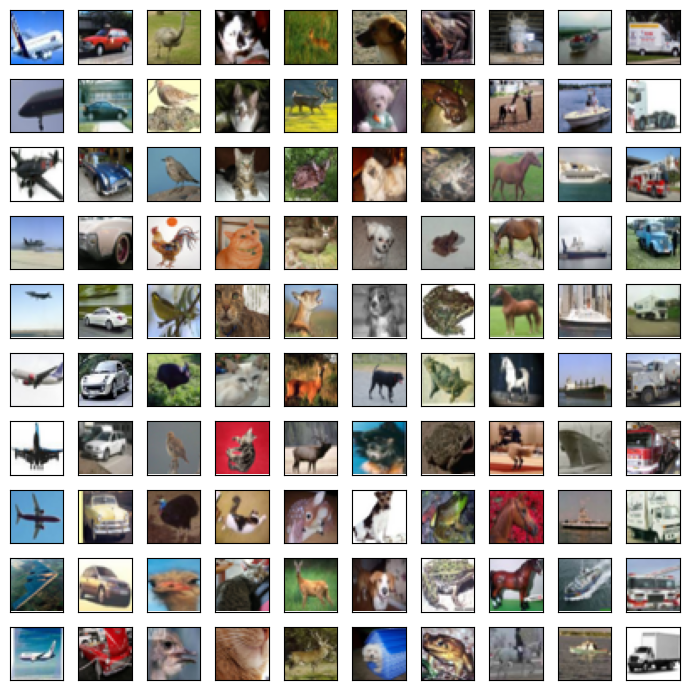

In [2]:
# Create a 20x10 subplot grid
fig, axs = plt.subplots(10, 10, figsize=(7, 7))

# Iterate over each class
for i, c in enumerate(np.unique(y_train)):
    # Select 10 random samples from this class
    idx = np.random.choice(np.where(y_train == c)[0], 10, replace=False)

    # Iterate over the 10 random samples
    for j, idx_j in enumerate(idx):
        # Get the corresponding image
        img = x_train[idx_j]

        # Display the image in the subplot
        axs[j, i].imshow(img)
        axs[j, i].set_xticks([])
        axs[j, i].set_yticks([])

# Layout so plots do not overlap
fig.tight_layout()
plt.show()

### Step 2: Label conversion

Convert the labels to one-hot encoding.

In [3]:
# Convert the labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10) # This line is causing the error because y_train is no longer numerical data
y_test = to_categorical(y_test, num_classes=10)


### Step 3: Image normalization

Normalize the images

In [4]:
# Normalize the images
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


### Step 4: Data augmentation

Use image data augmentation if relevant to enhance the diversity of the training data.

In [5]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation
# datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

# Fit the data generator on the training data
# datagen.fit(x_train)

## Creating and training the model

Here we wil start wit the basic model and we´ll start adding diferent layers, hyperparameters etc to see what works best

### Step 1: Defining the model

Define the model architecture

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, SeparableConv2D, GlobalAveragePooling2D, Activation
from tensorflow.keras.regularizers import l2  

model = Sequential()

# First convolutional block
model.add(Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', kernel_regularizer=l2(1e-3), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', kernel_regularizer=l2(1e-3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
    
# Second convolutional block
model.add(Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', kernel_regularizer=l2(1e-3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', kernel_regularizer=l2(1e-3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
    
# Third convolutional block
model.add(Conv2D(256, (3, 3), padding='same', kernel_initializer='he_uniform', kernel_regularizer=l2(1e-3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same', kernel_initializer='he_uniform', kernel_regularizer=l2(1e-3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
    
# Dense layers
model.add(Flatten())
model.add(Dense(1024, kernel_initializer='he_uniform', kernel_regularizer=l2(1e-3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(512, kernel_regularizer=l2(5e-4)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 32, 32, 64)        0

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

### Step 2: Model Training

Train the Model: Train the model and show how the accuracy and loss evolve over time using plots.

Use Callbacks: Implement callbacks like EarlyStopping and ModelCheckpoint if necessary.

In [7]:
import tensorflow as tf
from tensorflow.keras import backend as K

def focal_loss(gamma=2.0, alpha=0.25):
    """
    Focal Loss function for multi-class classification.
    
    Args:
        gamma (float): Focusing parameter. Higher values put more focus on hard-to-classify samples.
        alpha (float): Balancing factor to reduce the impact of easy negatives and amplify the importance of hard positives.
    
    Returns:
        Loss function to be used with model.compile.
    """
    def focal_loss_fixed(y_true, y_pred):
        # Clip predictions to prevent log(0) error
        y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
        
        # Compute the cross-entropy loss
        ce_loss = -y_true * K.log(y_pred)
        
        # Calculate the focal loss component
        loss = alpha * K.pow(1 - y_pred, gamma) * ce_loss
        
        # Return the mean loss across all samples
        return K.sum(loss, axis=1)
    
    return focal_loss_fixed

model.compile(loss=focal_loss(gamma=2.0, alpha=0.25),
              optimizer='adam',
              metrics = ['accuracy'])

In [8]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Calculate class weights to adjust the loss function based on the training data
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train.argmax(axis=1)),
                                     y=y_train.argmax(axis=1))
class_weights_dict = dict(enumerate(class_weights))

class_weights_dict[3] *= 2 
class_weights_dict[5] *= 2 

In [9]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Define the ReduceLROnPlateau callback
lr_reduction = ReduceLROnPlateau(monitor='val_loss',   # Monitor validation loss
                                 patience=3,           # Number of epochs with no improvement after which learning rate will be reduced
                                 factor=0.5,           # Factor by which the learning rate will be reduced. New_lr = lr * factor
                                 min_lr=1e-6)          # Lower bound on the learning rate
early_stopper = EarlyStopping(
    monitor='val_loss',        # Monitor validation loss
    patience=5,                # Number of epochs with no improvement after which training stops
    restore_best_weights=True  # Restore the best weights observed during training
)

In [10]:
history = model.fit(x_train, y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test),class_weight=class_weights_dict, callbacks=[lr_reduction, early_stopper])

Epoch 1/100


2024-09-27 09:13:46.071543: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-09-27 09:13:47.943036: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-09-27 09:13:52.508484: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f0e84179d90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-09-27 09:13:52.508518: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA RTX A4000, Compute Capability 8.6
2024-09-27 09:13:52.529820: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1727428432.656171      95 device_compiler.h:186] Compiled cluster using XLA!  Thi

391/391 [==============================] - 23s 29ms/step - loss: 2.4803 - accuracy: 0.4025 - val_loss: 1.2549 - val_accuracy: 0.2533 - lr: 0.0010
Epoch 2/100
391/391 [==============================] - 9s 22ms/step - loss: 0.6489 - accuracy: 0.5562 - val_loss: 0.5932 - val_accuracy: 0.4196 - lr: 0.0010
Epoch 3/100
391/391 [==============================] - 9s 22ms/step - loss: 0.4151 - accuracy: 0.6179 - val_loss: 0.3916 - val_accuracy: 0.5741 - lr: 0.0010
Epoch 4/100
391/391 [==============================] - 9s 22ms/step - loss: 0.3711 - accuracy: 0.6402 - val_loss: 0.5529 - val_accuracy: 0.3989 - lr: 0.0010
Epoch 5/100
391/391 [==============================] - 9s 22ms/step - loss: 0.3595 - accuracy: 0.6441 - val_loss: 0.4655 - val_accuracy: 0.4318 - lr: 0.0010
Epoch 6/100
391/391 [==============================] - 9s 22ms/step - loss: 0.3532 - accuracy: 0.6555 - val_loss: 0.4806 - val_accuracy: 0.4378 - lr: 0.0010
Epoch 7/100
391/391 [==============================] - 9s 23ms/step -

## Model Evaluation

Evaluate the model using different metrics such as loss and accuracy for training, testing and validation

### Step 1: Loss and Accuracy

Plot the model loss with the cross entropy loss curve and the accuracy curve to check training history and overfitting

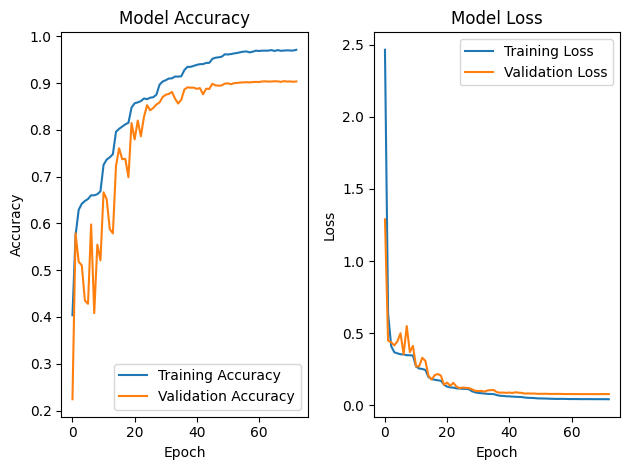

In [11]:
# Plot Cross Entropy Loss curve
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### Step 2: Model overall accuracy

Check the model overall accuracy its validation and test accuracy and loss both in the training, testing and validation steps by ploting the training history

In [12]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

# Get final training metrics
train_acc = history.history['accuracy'][-1]
train_loss = history.history['loss'][-1]

# Get final validation metrics
val_acc = history.history['val_accuracy'][-1]
val_loss = history.history['val_loss'][-1]

print(f'Training accuracy: {train_acc:.2f}, loss: {train_loss:.2f}')
print(f'Validation accuracy: {val_acc:.2f}, loss: {val_loss:.2f}')
print(f'Test accuracy: {test_acc:.2f}, loss: {test_loss:.2f}')

Training accuracy: 0.97, loss: 0.04
Validation accuracy: 0.90, loss: 0.08
Test accuracy: 0.90, loss: 0.08


### Step 3: Confusion Matrix

Plot the confusion matrix to see how the model is performing in terms of misclassification specially of one class against the others

313/313 [==============================] - 1s 2ms/step


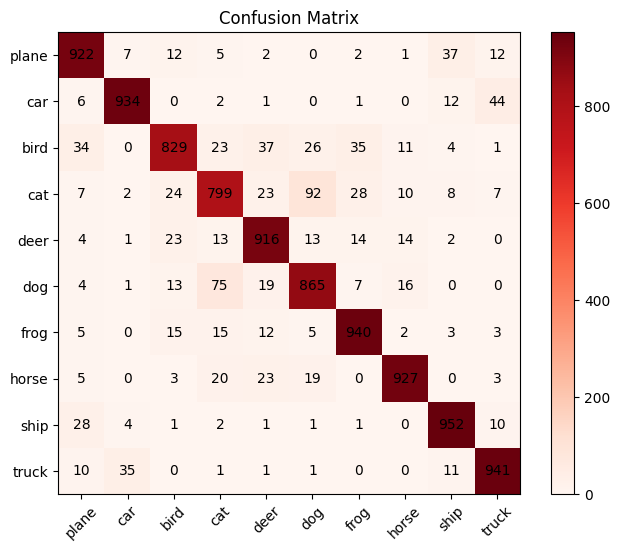

              precision    recall  f1-score   support

       plane       0.90      0.92      0.91      1000
         car       0.95      0.93      0.94      1000
        bird       0.90      0.83      0.86      1000
         cat       0.84      0.80      0.82      1000
        deer       0.89      0.92      0.90      1000
         dog       0.85      0.86      0.86      1000
        frog       0.91      0.94      0.93      1000
       horse       0.94      0.93      0.94      1000
        ship       0.93      0.95      0.94      1000
       truck       0.92      0.94      0.93      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [13]:
import seaborn as sns
from sklearn.metrics import classification_report

# Predict the output for the test split
y_pred = model.predict(x_test)

# Convert the predictions to class labels
y_pred_class = np.argmax(y_pred, axis=1)

# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_class)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Reds')
plt.title('Confusion Matrix')
plt.colorbar()

# Use the custom class names as tick labels
plt.xticks(range(len(custom_class_names)), custom_class_names, rotation=45)
plt.yticks(range(len(custom_class_names)), custom_class_names)

# Add numbers to the confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.show()

# Ensure both y_test and y_pred_class are in the same format
y_test_class = np.argmax(y_test, axis=1)

# Display a classification report
print(classification_report(y_test_class, y_pred_class, target_names = custom_class_names)) # Use y_test_class

### Step 4: Plot image prediction

Test on how the model perform on images from dataset. Random samples of images on a 10 x 10 matrix that contains 100 random images already classified by the model.

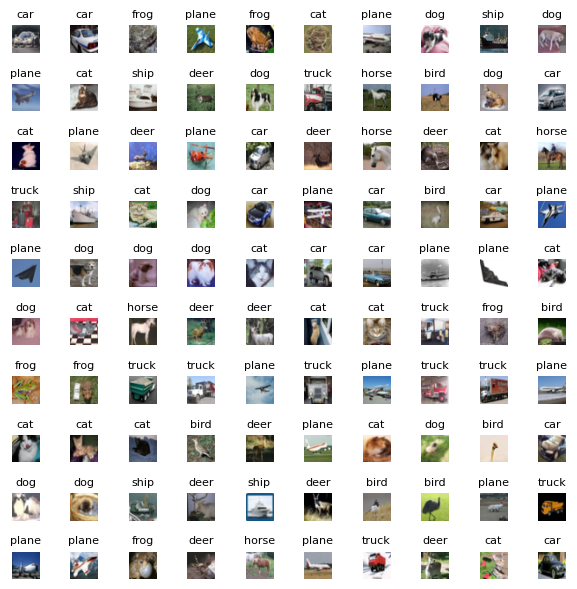

In [14]:
# Select a few examples from the test dataset
num_examples = 100
indices = np.random.choice(x_test.shape[0], num_examples, replace=False)
x_examples = x_test[indices]
y_examples = y_test[indices]

# Create a figure with subplots
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))

# Loop through the examples and display the images and class labels
for i, (x, y) in enumerate(zip(x_examples, y_examples)):
    ax = axes[i // 10, i % 10]
    ax.imshow(x)
    ax.set_title(custom_class_names[np.argmax(y)], fontsize=8)  # Use np.argmax to get the integer index and set fontsize to 8
    ax.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

ipywidgets

In [15]:
import ipywidgets as widgets
from IPython.display import display

# Image selection widget
image_selector = widgets.IntSlider(
    value=0,
    min=0,
    max=len(x_test) - 1,
    step=1,
    description='Image Index:',
    style={'description_width': 'initial'}
)

# Button to trigger prediction
predict_button = widgets.Button(description="Predict Class")

# Output area to display the results
output = widgets.Output()

# Display widgets
display(image_selector, predict_button, output)

# Function to display the image and prediction results
def predict_image(change):
    with output:
        # Clear previous output
        output.clear_output()

        # Get selected image index
        index = image_selector.value

        # Display the selected image
        plt.imshow(x_test[index])
        plt.title("Selected Image")
        plt.axis('off')
        plt.show()

        # Get the true label and predicted label
        true_label = custom_class_names[np.argmax(y_test[index])]
        image = np.expand_dims(x_test[index], axis=0)  # Add batch dimension
        predicted_probabilities = model.predict(image)
        predicted_class = custom_class_names[np.argmax(predicted_probabilities)]

        # Display the prediction result
        print(f"True Label: {true_label}")
        print(f"Predicted Class: {predicted_class}")

# Connect button click to prediction function
predict_button.on_click(predict_image)

IntSlider(value=0, description='Image Index:', max=9999, style=SliderStyle(description_width='initial'))

Button(description='Predict Class', style=ButtonStyle())

Output()